generate data for time 1000
generate data for time 300
generate data for time 100
generate data for time 30
generate data for time 15
generate data for time 5
generate data for time 3


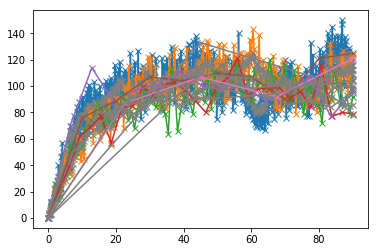

In [3]:
import pyabc
from study_abc_noise.model import MRNATranscriptionModelVars as ModelVars
import matplotlib.pyplot as plt
import numpy as np
import os
import logging
import pickle
%matplotlib inline

# for debugging
for module in ['Distance', 'Acceptor', 'Epsilon']:
    logger = logging.getLogger(module)
    logger.setLevel(logging.DEBUG)
    fh = logging.FileHandler('log/logger_laplace.log')
    fh.setLevel(logging.DEBUG)
    logger.addHandler(fh)

arr_n_t = [3, 5, 10, 15, 30, 100]
arr_n_t = [3, 5, 10, 15, 30, 100, 300, 1000]

# create data
for n_t in reversed(arr_n_t):
    fn = f"data/data_{n_t}_poisson.p"
    mv = ModelVars(n_t=n_t, noise_model='poisson')
    if not os.path.isfile(fn):
        print(f"generate data for time {n_t}")
        data_exact = mv.get_model()(mv.p_true)
        data = mv.add_noise_to_data(data_exact)
        pickle.dump((data_exact, data), open(fn, "wb"))
    data_exact, data = pickle.load(open(fn, "rb"))
    plt.plot(data['t'], data['mrna'], 'x-')
    plt.plot(data['t'], data_exact['mrna'], 'x-', color='grey')

In [ ]:
# proposed method

for n_t in arr_n_t:
    mv = ModelVars(n_t=n_t, noise_model='poisson')
    fb = f"mrna_{n_t}_poisson_stochacc"
    print(fb)
    if os.path.isfile(f"{fb}.db"):
        continue
    abc = pyabc.ABCSMC(
        models=mv.get_model(),
        parameter_priors=mv.get_prior(),
        distance_function=mv.get_kernel(),
        eps=pyabc.Temperature(log_file=f"log/log_temperature_{fb}.json", schemes=[
            pyabc.AcceptanceRateScheme(), pyabc.ExpDecayFixedRatioScheme(alpha=0.5)]),
       acceptor=pyabc.StochasticAcceptor(log_file=f"log/log_acceptor_{fb}.json"),
        population_size=1000,
        sampler=pyabc.sampler.MulticoreEvalParallelSampler(n_procs=20, check_max_eval=True)
    )
    data = pickle.load(open(f"data/data_{n_t}_poisson.p", "rb"))[1]
    abc.new(f"sqlite:///{fb}.db", data)
    abc.run()#min_acceptance_rate=1e-4)
    print()

INFO:History:Start <ABCSMC(id=1, start_time=2019-12-31 20:34:57.954014, end_time=None)>
INFO:ABC:Calibration sample before t=0.


mrna_3_poisson_stochacc


DEBUG:Acceptor:pdf_norm=-6.7529e+00 for t=0.
DEBUG:Epsilon:Proposed temperatures for 0: [29.24425076033175].
INFO:ABC:t: 0, eps: 29.24425076033175.
DEBUG:Acceptor:Encountered pd=-6.5808e+00 > c=-6.7529e+00, thus weight=1.0059e+00.
DEBUG:Acceptor:Encountered pd=-6.6315e+00 > c=-6.7529e+00, thus weight=1.0042e+00.
DEBUG:Acceptor:Encountered pd=-6.7179e+00 > c=-6.7529e+00, thus weight=1.0012e+00.
INFO:ABC:Acceptance rate: 1000 / 3707 = 2.6976e-01, ESS=1.0000e+03.
DEBUG:Acceptor:pdf_norm=-6.5808e+00 for t=1.
DEBUG:Epsilon:Proposed temperatures for 1: [7.346130663635915, 14.622125380165874].
INFO:ABC:t: 1, eps: 7.346130663635915.
INFO:ABC:Acceptance rate: 1000 / 3340 = 2.9940e-01, ESS=9.4412e+02.
DEBUG:Acceptor:pdf_norm=-6.5808e+00 for t=2.
DEBUG:Epsilon:Proposed temperatures for 2: [4.5704545406054775, 3.6730653318179574].
INFO:ABC:t: 2, eps: 3.6730653318179574.
INFO:ABC:Acceptance rate: 1000 / 3999 = 2.5006e-01, ESS=8.0717e+02.
DEBUG:Acceptor:pdf_norm=-6.5808e+00 for t=3.
DEBUG:Epsilon:Pr


mrna_5_poisson_stochacc


DEBUG:Acceptor:pdf_norm=-1.3131e+01 for t=0.
DEBUG:Epsilon:Proposed temperatures for 0: [58.57769173891321].
INFO:ABC:t: 0, eps: 58.57769173891321.
INFO:ABC:Acceptance rate: 1000 / 3249 = 3.0779e-01, ESS=1.0000e+03.
DEBUG:Acceptor:pdf_norm=-1.3131e+01 for t=1.
DEBUG:Epsilon:Proposed temperatures for 1: [13.539255227406269, 29.288845869456605].
INFO:ABC:t: 1, eps: 13.539255227406269.
DEBUG:Acceptor:Encountered pd=-1.3022e+01 > c=-1.3131e+01, thus weight=1.0081e+00.
INFO:ABC:Acceptance rate: 1000 / 3358 = 2.9780e-01, ESS=9.5537e+02.
DEBUG:Acceptor:pdf_norm=-1.3022e+01 for t=2.
DEBUG:Epsilon:Proposed temperatures for 2: [6.578424204684783, 6.769627613703134].
INFO:ABC:t: 2, eps: 6.578424204684783.
INFO:ABC:Acceptance rate: 1000 / 3469 = 2.8827e-01, ESS=8.3894e+02.
DEBUG:Acceptor:pdf_norm=-1.3022e+01 for t=3.
DEBUG:Epsilon:Proposed temperatures for 3: [5.689727972230908, 3.2892121023423915].
INFO:ABC:t: 3, eps: 3.2892121023423915.
INFO:ABC:Acceptance rate: 1000 / 5900 = 1.6949e-01, ESS=8.6


mrna_10_poisson_stochacc


INFO:History:Start <ABCSMC(id=1, start_time=2019-12-31 20:41:20.338130, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=-3.2205e+01 for t=0.
DEBUG:Epsilon:Proposed temperatures for 0: [111.87029031735015].
INFO:ABC:t: 0, eps: 111.87029031735015.
DEBUG:Acceptor:Encountered pd=-3.1802e+01 > c=-3.2205e+01, thus weight=1.0036e+00.
INFO:ABC:Acceptance rate: 1000 / 3569 = 2.8019e-01, ESS=1.0000e+03.
DEBUG:Acceptor:pdf_norm=-3.1802e+01 for t=1.
DEBUG:Epsilon:Proposed temperatures for 1: [22.308347328981608, 55.93514515867508].
INFO:ABC:t: 1, eps: 22.308347328981608.
DEBUG:Acceptor:Encountered pd=-3.0601e+01 > c=-3.1802e+01, thus weight=1.0553e+00.
DEBUG:Acceptor:Encountered pd=-3.1649e+01 > c=-3.1802e+01, thus weight=1.0069e+00.
DEBUG:Acceptor:Encountered pd=-3.1777e+01 > c=-3.1802e+01, thus weight=1.0011e+00.
DEBUG:Acceptor:Encountered pd=-3.1732e+01 > c=-3.1802e+01, thus weight=1.0031e+00.
INFO:ABC:Acceptance rate: 1000 / 3446 = 2.9019e-01, ESS=9.4813e+02.
DE


mrna_15_poisson_stochacc


DEBUG:Acceptor:pdf_norm=-5.1634e+01 for t=0.
DEBUG:Epsilon:Proposed temperatures for 0: [217.38113928756047].
INFO:ABC:t: 0, eps: 217.38113928756047.
DEBUG:Acceptor:Encountered pd=-4.7568e+01 > c=-5.1634e+01, thus weight=1.0189e+00.
INFO:ABC:Acceptance rate: 1000 / 3312 = 3.0193e-01, ESS=1.0000e+03.
DEBUG:Acceptor:pdf_norm=-4.7568e+01 for t=1.
DEBUG:Epsilon:Proposed temperatures for 1: [49.53902189332255, 108.69056964378024].
INFO:ABC:t: 1, eps: 49.53902189332255.
INFO:ABC:Acceptance rate: 1000 / 3488 = 2.8670e-01, ESS=9.3850e+02.
DEBUG:Acceptor:pdf_norm=-4.7568e+01 for t=2.
DEBUG:Epsilon:Proposed temperatures for 2: [25.475104912805254, 24.769510946661274].
INFO:ABC:t: 2, eps: 24.769510946661274.
INFO:ABC:Acceptance rate: 1000 / 3549 = 2.8177e-01, ESS=8.3535e+02.
DEBUG:Acceptor:pdf_norm=-4.7568e+01 for t=3.
DEBUG:Epsilon:Proposed temperatures for 3: [19.21416226084848, 12.384755473330637].
INFO:ABC:t: 3, eps: 12.384755473330637.
INFO:ABC:Acceptance rate: 1000 / 5579 = 1.7924e-01, ESS=


mrna_30_poisson_stochacc


INFO:History:Start <ABCSMC(id=1, start_time=2020-01-01 00:37:01.811561, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=-1.1397e+02 for t=0.
DEBUG:Epsilon:Proposed temperatures for 0: [356.88567186348877].
INFO:ABC:t: 0, eps: 356.88567186348877.
DEBUG:Acceptor:Encountered pd=-1.1344e+02 > c=-1.1397e+02, thus weight=1.0015e+00.
DEBUG:Acceptor:Encountered pd=-1.1329e+02 > c=-1.1397e+02, thus weight=1.0019e+00.
DEBUG:Acceptor:Encountered pd=-1.0749e+02 > c=-1.1397e+02, thus weight=1.0183e+00.
INFO:ABC:Acceptance rate: 1000 / 3596 = 2.7809e-01, ESS=1.0000e+03.
DEBUG:Acceptor:pdf_norm=-1.0749e+02 for t=1.
DEBUG:Epsilon:Proposed temperatures for 1: [79.83169120605486, 178.44283593174438].
INFO:ABC:t: 1, eps: 79.83169120605486.
INFO:ABC:Acceptance rate: 1000 / 3487 = 2.8678e-01, ESS=9.2912e+02.
DEBUG:Acceptor:pdf_norm=-1.0749e+02 for t=2.
DEBUG:Epsilon:Proposed temperatures for 2: [39.96228538959593, 39.91584560302743].
INFO:ABC:t: 2, eps: 39.91584560302743.
DE

In [ ]:
# sequential but bad c

for n_t in arr_n_t:
    mv = ModelVars(n_t=n_t)
    fb = f"mrna_{n_t}_{succ_prob}_stochacc_badc"
    if os.path.isfile(f"{fb}.db"):
        continue
    abc = pyabc.ABCSMC(
        models=mv.get_model(),
        parameter_priors=mv.get_prior(),
        distance_function=mv.get_kernel(),
        eps=pyabc.Temperature(log_file=f"log/log_temperature_{fb}.json"),
        acceptor=pyabc.StochasticAcceptor(pdf_norm_method=pyabc.pdf_norm_from_kernel,
                                          log_file=f"log/log_acceptor_{fb}.json"),
        population_size=1000,
        sampler=pyabc.sampler.MulticoreEvalParallelSampler(n_procs=20, check_max_eval=True)
    )
    data = pickle.load(open(f"data/data_{n_t}_{succ_prob}.p", "rb"))[1]
    abc.new(f"sqlite:///{fb}.db", data)
    abc.run(min_acceptance_rate=1e-3)
    print()

In [ ]:
# rejection with adaptive c (in general not applicable)

for n_t in arr_n_t:
    mv = ModelVars(n_t=n_t)
    fb = f"mrna_{n_t}_{succ_prob}_rejection"
    if os.path.isfile(f"{fb}.db"):
        continue
    abc = pyabc.ABCSMC(
        models=mv.get_model(),
        parameter_priors=mv.get_prior(),
        distance_function=mv.get_kernel(),
        eps=pyabc.Temperature(log_file=f"log/log_temperature_{fb}.json"),
        acceptor=pyabc.StochasticAcceptor(log_file=f"log/log_acceptor_{fb}.json"),
        population_size=1000,
        sampler=pyabc.sampler.MulticoreEvalParallelSampler(n_procs=20, check_max_eval=True)
    )
    data = pickle.load(open(f"data/data_{n_t}_{succ_prob}.p", "rb"))[1]
    abc.new(f"sqlite:///{fb}.db", data)
    abc.run(max_nr_populations=1, min_acceptance_rate=1e-3)
    print()

In [ ]:
# rejection with bad (but correct) c

for n_t in arr_n_t:
    mv = ModelVars(n_t=n_t)
    fb = f"mrna_{n_t}_{succ_prob}_rejection_badc"
    if os.path.isfile(f"{fb}.db"):
        continue
    abc = pyabc.ABCSMC(
        models=mv.get_model(),
        parameter_priors=mv.get_prior(),
        distance_function=mv.get_kernel(),
        eps=pyabc.Temperature(log_file=f"log/log_temperature_{fb}.json"),
        acceptor=pyabc.StochasticAcceptor(pdf_norm_method=pyabc.pdf_norm_from_kernel,
                                          log_file=f"log/log_acceptor_{fb}.json"),
        population_size=1000,
    )
    data = pickle.load(open(f"data/data_{n_t}_{succ_prob}.p", "rb"))[1]
    abc.new(f"sqlite:///{fb}.db", data)
    abc.run(max_nr_populations=1, min_acceptance_rate=1e-3)
    print()

In [ ]:
# noisy model

for n_t in arr_n_t:
    mv = ModelVars(n_t=n_t)
    fb = f"mrna_{n_t}_{succ_prob}_noisymodel"
    if os.path.isfile(f"{fb}.db"):
        continue
    abc = pyabc.ABCSMC(
        models=mv.get_model_noisy(),
        parameter_priors=mv.get_prior(),
        distance_function=mv.get_distance(),
        population_size=1000,
        sampler=pyabc.sampler.MulticoreEvalParallelSampler(n_procs=20, check_max_eval=True)
    )
    data = pickle.load(open(f"data/data_{n_t}_{succ_prob}.p", "rb"))[1]
    abc.new(f"sqlite:///{fb}.db", data)
    abc.run(min_acceptance_rate=1e-3)
    print()